In [3]:
from selenium import webdriver
import time
import matplotlib.pyplot as plt
import numpy as np
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
driver = webdriver.Opera(executable_path = 'D:\operadriver_win64\operadriver.exe')

Matplotlib is building the font cache; this may take a moment.


In [4]:
def loginInstagram(username , password):
    driver.get('https://www.instagram.com')
    driver.implicitly_wait(3)
    
    username = driver.find_element_by_name('username').send_keys(username)
    password = driver.find_element_by_name('password').send_keys(password)
    Login_button = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()
    
    not_now = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Not Now")]'))).click()
    not_now2 = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Not Now")]'))).click()




In [5]:
loginInstagram('SAMPLE_USERNAME' , 'SAMPLE_PASSWORD')

In [2]:
def searchResults(text):
    searchbox = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
    searchbox.clear()
    searchbox.send_keys(text)
    time.sleep(5)
    search_results = driver.find_elements_by_xpath("//div[contains(@class , 'fuqBx')]//a")
    results = []
    for i in search_results:
        s = i.get_attribute('href')
        s = s.split('/')
        if(len(s)==5):
            results.append(s[3])
    return results

In [8]:
#Question 1.1
li_profiles = searchResults('food')
li_profiles = li_profiles[:10]
i=1
for ele in li_profiles:
    print(i,". ",ele)
    i+=1

1 .  foodtalkindia
2 .  delhi_street_food1
3 .  dilsefoodie
4 .  covid.food.relief
5 .  yourfoodlab
6 .  food_forces
7 .  food
8 .  foodrush.recipe
9 .  the.food_cult
10 .  foodnetwork


In [9]:
def openProfile(profile):
    searchbox = WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Search']")))
    searchbox.clear()
    time.sleep(3)
    searchbox.send_keys(profile)
    time.sleep(3)
    button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "fuqBx")]/div/a')))
    button.click()
    

In [21]:
#works only if a profile is opened
def getNumFollowers():
    try:
        followerText = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, '//span[contains(@class, "g47SY")]'))
            )
        followers = followerText[1].get_attribute('title')
        return followers
    except:
        pass
    
def firstPost():
    post = driver.find_element_by_class_name("kIKUG");
    post.click()
    
def nextPost():
    btn_next = driver.find_element_by_xpath('//div[contains(@class, "DdSX2")]/a[last()]')
    btn_next.click()
    time.sleep(1)

In [22]:
def getProfileWithTopFollowers(li_profiles):
    dict_followers = {}
    for ele in li_profiles:
        openProfile(ele)
        time.sleep(2)
        numFollowers = getNumFollowers()
        numFollowers = numFollowers.replace(',', '')
        dict_followers[ele] = int(numFollowers)
        time.sleep(1)
    li_ans = [(k,v) for k, v in sorted(dict_followers.items(), key=lambda item: item[1])]
    li_ans = li_ans[::-1]
    li_ans = li_ans[0:5]
    return li_ans

In [12]:
#Question 1.1
li_topFollowers = getProfileWithTopFollowers(li_profiles)
for ele in li_topFollowers:
    print(ele)

('foodnetwork', 11333262)
('yourfoodlab', 1712359)
('dilsefoodie', 785579)
('foodrush.recipe', 588170)
('food', 305014)


In [23]:
from datetime import date
# this works only when a post is opened
def getDateOfPost():
    # wait how much it is required
    date = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "_1o9PC Nzb55")]'))
    )
    date = date.get_attribute('datetime')
    date = date.split('T')
    date = date[0]
    date = date.split('-')
    date = int(date[-1])
    return date


def getNumPosts(li):
    today = str(date.today())
    today = today.split('-')
    today = int(today[-1])
    
    nameCount = []
    
    for ele in li:
        count = 0
        
        # page has been opened
        openProfile(ele[0])
        time.sleep(1)
        firstPost()
        dateOfPost = getDateOfPost()
        while today - dateOfPost <= 3:
            count = count + 1
            nextPost()
            dateOfPost = getDateOfPost()
        btnClose = driver.find_elements_by_xpath('//button[contains(@class, "wpO6b")]')[-1]
        btnClose.click()
        nameCount.append((ele[0], count))
        time.sleep(2)
    return nameCount

In [24]:
#Question 1.2
nameCount = getNumPosts(li_topFollowers)
for ele in nameCount:
    print(ele)

('foodnetwork', 35)
('yourfoodlab', 2)
('dilsefoodie', 4)
('foodrush.recipe', 6)
('food', 4)


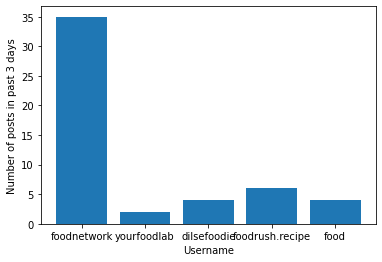

In [25]:
#Question 1.3
# making bar graph
li_names = [ele[0] for ele in nameCount]
li_count = [ele[1] for ele in nameCount]
plt.bar(li_names, li_count)
plt.xlabel('Username')
plt.ylabel('Number of posts in past 3 days')
plt.show()

In [28]:
#Question 2.1
def getHashTags(li_usernames):
    d_words = {}
    for ele in li_usernames:
        openProfile(ele[0])
        time.sleep(2)
        firstPost()

        #find hashtags
        i = 0
        while i < 10:
            try:
                li_allTags = WebDriverWait(driver, 5).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//a[contains(@class, " xil3i")]'))
                    )
                for ele in li_allTags:
                    text = ele.text
                    d_words[text] = d_words.get(text,0) + 1
            except:
                pass
            nextPost()
            i = i+1
        btnExit = driver.find_elements_by_xpath('//button[contains(@class, "wpO6b")]')[-1]
        btnExit.click()
    return d_words

d_words = getHashTags(li_topFollowers)
d_words

{'#DeliciousMissBrown': 1,
 '#GreatFoodTruckRace': 2,
 '#TheKitchen': 1,
 '#discoveryplus': 4,
 '#ChoppedNextGen': 1,
 '#Unwrapped': 1,
 '#BestBakerInAmerica': 1,
 '#BudgetBattle': 1,
 '#TheExtraMile': 2,
 '#chinesefood': 2,
 '#food': 10,
 '#rice': 2,
 '#schezwan': 1,
 '#schezwannoodles': 1,
 '#schezwansauce': 1,
 '#ricelover': 2,
 '#cravings': 1,
 '#cravingsatisfied': 1,
 '#manchurian': 1,
 '#manchurianballs': 1,
 '#sanjyotkeer': 8,
 '#yourfoodlab': 8,
 '#instadaily': 6,
 '#foodporn': 10,
 '#recipe': 10,
 '#kachori': 2,
 '#rajkachori': 2,
 '#streetfood': 10,
 '#indiancuisine': 7,
 '#indianfood': 4,
 '#foodphotography': 8,
 '#kachorilove': 2,
 '#foodie': 15,
 '#mumbaistagram': 2,
 '#mumbaifood': 2,
 '#recipes': 6,
 '#recipeoftheday': 2,
 '#sandwich': 3,
 '#sandwichesofinstagram': 2,
 '#sandwichlover': 2,
 '#cheese': 5,
 '#cheesesandwich': 2,
 '#grilledsandwich': 2,
 '#vegetarian': 2,
 '#homemade': 3,
 '#sheekh': 1,
 '#kabab': 1,
 '#video': 1,
 '#mumbaistreetfood': 1,
 '#achaar': 2,
 '#

In [29]:
#Question 2.2
#Create dataframe
import pandas as pd
df = pd.DataFrame(d_words.items(), columns=['Words', 'Frequency'])
df.sort_values(by=['Frequency'], ascending = False, inplace = True)
df.reset_index(inplace=True, drop = True)
df

,Words,Frequency
0,#foodie,15
1,#food,10
2,,10
3,#foodporn,10
4,#recipe,10
...,...,...
118,#pakora,1
119,#breadpakoda,1
120,#masala,1
121,#streetstyle,1


In [31]:
#Question 2.3
#Create csv
df.to_csv('words.csv', index = False)
#Question 2.4
for i in range(10):
    print(df.iloc[i]['Words'], ":", df.iloc[i]['Frequency'])

#foodie : 15
#food : 10
 : 10
#foodporn : 10
#recipe : 10
#streetfood : 10
#sanjyotkeer : 8
#yourfoodlab : 8
#foodphotography : 8
#indiancuisine : 7


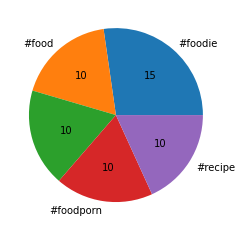

In [32]:
#Question 2.5
li_words = df['Words'][0:5]
li_frequency = df['Frequency'][0:5]
li_frequency = np.array(li_frequency)

def absolute_value(val):
    a  = np.round(val/100*li_frequency.sum())
    return int(a)

plt.pie(li_frequency, labels=li_words, autopct=absolute_value)
plt.show()

In [34]:
#Question 3.*
def getAvgLikes(li_usernames):
    li_ans = []
    for ele in li_usernames:
        li_likes = []
        print(ele[0])
        openProfile(ele[0])
        time.sleep(1)
        firstPost()
        time.sleep(1)
        i=0
        while i < 10:
            try:
                likes = WebDriverWait(driver, 5).until(
                    EC.presence_of_element_located((By.CLASS_NAME, 'vcOH2'))
                )
                likes.click()
                numLikes = WebDriverWait(driver, 5).until(
                    EC.presence_of_element_located((By.CLASS_NAME, 'vJRqr'))
                )
                likes = numLikes.text
                print(likes)
                li_likes.append(likes)
                driver.find_element_by_class_name('QhbhU').click()
            except:
                pass
            try:
                likes = WebDriverWait(driver,5).until(
                    EC.presence_of_element_located((By.CLASS_NAME, 'zV_Nj'))
                )
                likes = likes.text
                print(likes)

                li_likes.append(likes)
                
            except:
                pass
            nextPost()
            i += 1
        li_ans.append([ele[0], li_likes])
        print()
        btnExit = driver.find_elements_by_xpath('//button[contains(@class, "wpO6b")]')[-1]
        btnExit.click()
    return li_ans

In [35]:
li_ans = getAvgLikes(li_topFollowers)

foodnetwork
17,930 likes
3,998 likes
3,219 likes
6,516 likes
16,772 likes
19,117 likes
4,571 likes
6,851 likes
3,394 likes
3,086 likes

yourfoodlab

27,812 likes

54,616 likes
37,432 likes
32,825 likes

19,988 likes
18,497 likes
47,036 likes

dilsefoodie
1,451 likes
8,521 likes
8,018 likes
14,741 likes
9,748 likes
6,619 likes
20,622 likes
5,226 likes
9,734 likes
9,556 likes

foodrush.recipe
5,170 likes
23,649 likes
7,880 likes
12,253 likes
51,487 likes
32,022 likes
15,926 likes
9,820 likes
76,992 likes
41,552 likes

food
99 likes
769 likes
462 likes
1,517 likes
1,477 likes
230 likes
359 likes
3,239 likes
372 likes
1,192 likes



In [49]:
li_numLikes = []
for ele in li_ans:
    add = 0
    for num in ele[1]:
        if(len(num)==0):
            continue
        num = num.split()
        num = num[0]
        num = num.replace(',' , '')
        num = int(num)
        add += num
    small_ele = [ele[0], add/len(ele[1])]
    li_numLikes.append(small_ele)
print(li_numLikes)

[['foodnetwork', 8545.4], ['yourfoodlab', 23820.6], ['dilsefoodie', 9423.6], ['foodrush.recipe', 27675.1], ['food', 971.6]]


In [50]:
import numpy as np
li_name = []
li_followers = []
li_likes = []
for i in range(len(li_topFollowers)):
    li_name.append(li_topFollowers[i][0])
    li_followers.append(li_topFollowers[i][1])
    li_likes.append(li_numLikes[i][1])
    
li_followers = np.array(li_followers)
li_likes = np.array(li_likes)
li_ratio = li_followers/li_likes
print(li_names)
print(li_followers)
print(li_likes)
print(li_ratio)

['foodnetwork', 'yourfoodlab', 'dilsefoodie', 'foodrush.recipe', 'food']
[11333262  1712359   785579   588170   305014]
[ 8545.4 23820.6  9423.6 27675.1   971.6]
[1326.2412526    71.8856368    83.36293985   21.2526784   313.92960066]


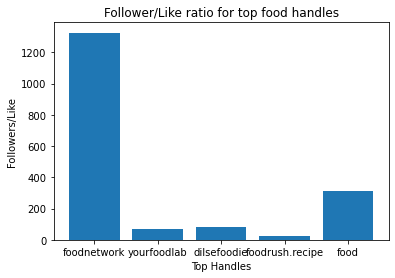

In [51]:
plt.bar(li_name, li_ratio)
plt.title("Follower/Like ratio for top food handles")
plt.xlabel("Top Handles")
plt.ylabel("Followers/Like")
plt.show()